## imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as mno
from sklearn import linear_model
%matplotlib inline

In [2]:
try:
    data = pd.read_csv('diabetes.csv')
except FileNotFoundError:
    print('File not found!!')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)2)

DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)

Age: Age (years)

Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
col_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[col_with_zero] = data[col_with_zero].replace(0, np.nan)

In [6]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<AxesSubplot:>

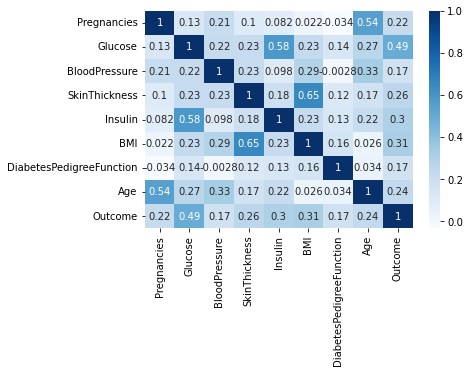

In [7]:
corr = data.corr()
sns.heatmap(corr, cmap='Blues', annot=True)

In [8]:
def random_imputation(df, feature):
    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    return df

In [9]:
for feature in col_with_zero:
    data[feature + '_imp'] = data[feature]
    data = random_imputation(data, feature)

In [10]:
data[col_with_zero] = data[col_with_zero].fillna(0)
dfTrain = data[:650]
dfTest = data[650:750]
dfCheck = data[750:]
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))

C:\Users\Rahul\AppData\Local\Temp/ipykernel_6984/88783405.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  trainData = np.asarray(dfTrain.drop('Outcome',1))
C:\Users\Rahul\AppData\Local\Temp/ipykernel_6984/88783405.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  testData = np.asarray(dfTest.drop('Outcome',1))


In [11]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds

print(np.mean(trainData, axis=0))
print(np.std(trainData, axis=0))

[ 5.46571335e-18 -1.50307117e-16  3.22477088e-16 -2.39124959e-17
  3.82599935e-17  4.91914202e-17  1.61238544e-16  1.17512837e-16
 -1.12047124e-16 -5.91663470e-16 -8.74514136e-17  8.33521286e-17
  4.91914202e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [12]:
from sklearn.linear_model import LogisticRegression
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

LogisticRegression()

In [13]:
accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  78.0 %


# fill missing value with deterministic approach

In [14]:
deter_data = pd.DataFrame(columns = ["Det" + name for name in col_with_zero])

for feature in col_with_zero:
    deter_data["Det" + feature] = data[feature + "_imp"]
    parameters = list(set(data.columns) - set(col_with_zero) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = data[parameters], y = data[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[data[feature].isnull(), "Det" + feature] = model.predict(data[parameters])[data[feature].isnull()]

C:\Users\Rahul\anaconda3\envs\mle\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rahul\anaconda3\envs\mle\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


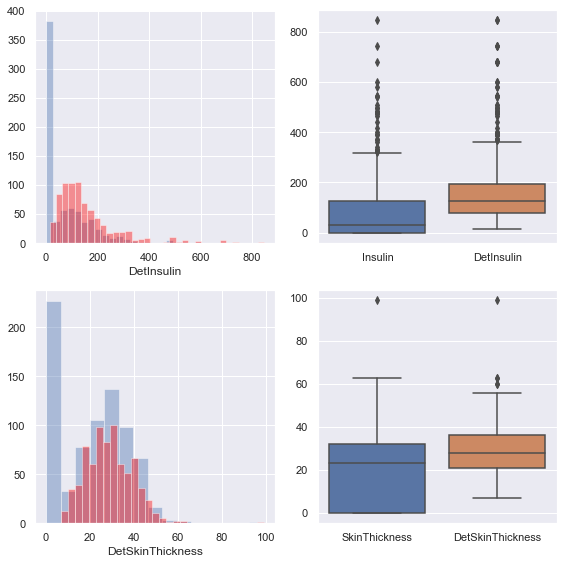

In [15]:
sns.set()
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(["Insulin", "SkinThickness"]):
    sns.distplot(data[variable].dropna(), kde = False, ax = axes[index, 0])
    sns.distplot(deter_data["Det" + variable], kde = False, ax = axes[index, 0], color = 'red')
    
    sns.boxplot(data = pd.concat([data[variable], deter_data["Det" + variable]], axis = 1),
                ax = axes[index, 1])
    
plt.tight_layout()



In [16]:
deter_data_final = deter_data.join(data[['Pregnancies', 'DiabetesPedigreeFunction', 'Age', 'Outcome']])

In [17]:
dfTrain = deter_data_final[:650]
dfTest = deter_data_final[650:750]
dfCheck = deter_data_final[750:]
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))

C:\Users\Rahul\AppData\Local\Temp/ipykernel_6984/2349417263.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  trainData = np.asarray(dfTrain.drop('Outcome',1))
C:\Users\Rahul\AppData\Local\Temp/ipykernel_6984/2349417263.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  testData = np.asarray(dfTest.drop('Outcome',1))


In [18]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds

print(np.mean(trainData, axis=0))
print(np.std(trainData, axis=0))

[-1.12047124e-16 -5.91663470e-16 -8.74514136e-17  8.33521286e-17
  4.91914202e-16  5.46571335e-18  1.61238544e-16  1.17512837e-16]
[1. 1. 1. 1. 1. 1. 1. 1.]


In [19]:
from sklearn.linear_model import LogisticRegression
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

LogisticRegression()

In [20]:
accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  79.0 %


# fill missing value with Stochastic Regression Imputation


In [21]:
random_data = pd.DataFrame(columns = ["Ran" + name for name in col_with_zero])
for feature in col_with_zero:
    random_data["Ran" + feature] = data[feature + '_imp']
    parameters = list(set(data.columns) - set(col_with_zero) - {feature + '_imp'})
    model = linear_model.LinearRegression()
    model.fit(X = data[parameters], y = data[feature + '_imp'])
    #Standard Error of the regression estimates is equal to std() of the errors of each estimates
    predict = model.predict(data[parameters])
    std_error = (predict[data[feature].notnull()] - data.loc[data[feature].notnull(), feature + '_imp']).std()
    #observe that I preserve the index of the missing data from the original dataframe
    random_predict = np.random.normal(size = data[feature].shape[0], 
                                      loc = predict, 
                                      scale = std_error)
    random_data.loc[(data[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(data[feature].isnull()) & 
                                                                            (random_predict > 0)]


C:\Users\Rahul\anaconda3\envs\mle\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rahul\anaconda3\envs\mle\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


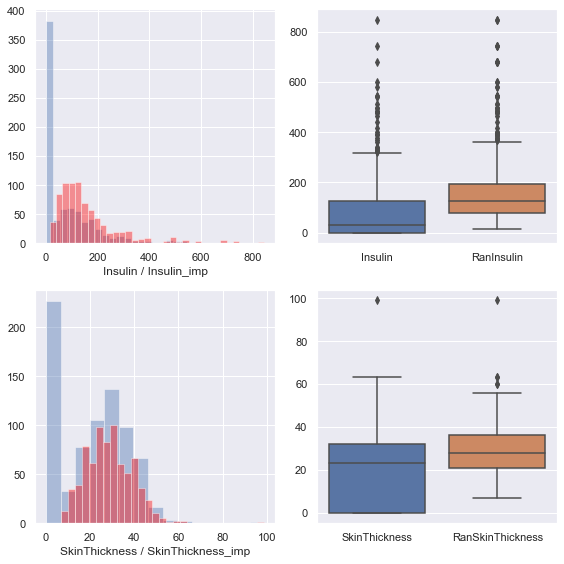

In [22]:
sns.set()
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(["Insulin", "SkinThickness"]):
    sns.distplot(data[variable].dropna(), kde = False, ax = axes[index, 0])
    sns.distplot(random_data["Ran" + variable], kde = False, ax = axes[index, 0], color = 'red')
    axes[index, 0].set(xlabel = variable + " / " + variable + '_imp')
    
    sns.boxplot(data = pd.concat([data[variable], random_data["Ran" + variable]], axis = 1),
                ax = axes[index, 1])
    
    plt.tight_layout()



In [23]:
random_data

,RanGlucose,RanBloodPressure,RanSkinThickness,RanInsulin,RanBMI
0,148.0,72.0,35.0,205.0,33.6
1,85.0,66.0,29.0,182.0,26.6
2,183.0,64.0,20.0,291.0,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9
764,122.0,70.0,27.0,60.0,36.8
765,121.0,72.0,23.0,112.0,26.2
766,126.0,60.0,22.0,36.0,30.1


In [24]:
random_data_final = random_data.join(data[['Pregnancies', 'DiabetesPedigreeFunction', 'Age', 'Outcome']])

In [25]:
dfTrain = random_data_final[:650]
dfTest = random_data_final[650:750]
dfCheck = random_data_final[750:]
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))

C:\Users\Rahul\AppData\Local\Temp/ipykernel_6984/1783217709.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  trainData = np.asarray(dfTrain.drop('Outcome',1))
C:\Users\Rahul\AppData\Local\Temp/ipykernel_6984/1783217709.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  testData = np.asarray(dfTest.drop('Outcome',1))


In [26]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds

print(np.mean(trainData, axis=0))
print(np.std(trainData, axis=0))

[-1.12047124e-16 -5.91663470e-16 -8.74514136e-17  8.33521286e-17
  4.91914202e-16  5.46571335e-18  1.61238544e-16  1.17512837e-16]
[1. 1. 1. 1. 1. 1. 1. 1.]


In [27]:
from sklearn.linear_model import LogisticRegression
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

LogisticRegression()

In [28]:
accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  79.0 %


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(trainData, trainLabel)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.77
Best parameters:  {'C': 0.1}
Best estimator:  LogisticRegression(C=0.1)


In [30]:
lr = grid.best_estimator_
lr.fit(trainData, trainLabel)
# lr.predict(Xtest)
print('Score: {:.2f}'.format(lr.score(testData, testLabel)))

Score: 0.76
